## Problem Statement - I

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding


The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.


When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1.Approved: The Company has approved loan Application

2.Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3.Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4.Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## Problem Statement - II

#### Results Expected by Learners

1.Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

2.Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

1.Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

2.Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.


## Loading of Data set 

### Importing python libraries



In [1]:
## Importing all the python libraries and warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np         
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Uploading Dataset


In [2]:
app_data = pd.read_csv("application_data.csv")
pd.set_option('display.max_columns', None)
app_data1 = app_data
app_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking shape of data

In [3]:
# Checking the columns and rows of the data 
app_data1.shape

(307511, 122)

### Checking datatypes of different columns


In [4]:
app_data1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### Checking for a null values


In [5]:
## Checking all tbe null values to work on them accordingly
app_data1.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

### Percentage of null values in each column


In [6]:
## Checking missing value percentage is important
missing_perc = app_data1.isnull().sum().sort_values(ascending=False)
pd.set_option('display.max_columns', None)

100*missing_perc/len(app_data1)


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

#### Dropping columns having null values more than 50 percentage and having less significance on target Varriable

In [7]:
## Dropping all the Higher percentage column so as to have a clean data
app_data1=app_data1.drop(["COMMONAREA_MEDI"], axis=1)
app_data1=app_data1.drop(["COMMONAREA_AVG"], axis=1)
app_data1=app_data1.drop(["COMMONAREA_MODE"], axis=1)
app_data1=app_data1.drop(["NONLIVINGAPARTMENTS_MODE"], axis=1)
app_data1=app_data1.drop(["NONLIVINGAPARTMENTS_AVG"], axis=1)
app_data1=app_data1.drop(["NONLIVINGAPARTMENTS_MEDI"], axis=1)
app_data1=app_data1.drop(["FONDKAPREMONT_MODE"], axis=1)
app_data1=app_data1.drop(["LIVINGAPARTMENTS_AVG"], axis=1)
app_data1=app_data1.drop(["LIVINGAPARTMENTS_MODE"], axis=1)
app_data1=app_data1.drop(["LIVINGAPARTMENTS_MEDI"], axis=1)
app_data1=app_data1.drop(["FLOORSMIN_AVG"], axis=1)
app_data1=app_data1.drop(["FLOORSMIN_MODE"], axis=1)
app_data1=app_data1.drop(["FLOORSMIN_MEDI"], axis=1)
app_data1=app_data1.drop(["YEARS_BUILD_AVG"], axis=1)
app_data1=app_data1.drop(["YEARS_BUILD_MODE"], axis=1)
app_data1=app_data1.drop(["YEARS_BUILD_MEDI"], axis=1)
app_data1=app_data1.drop(["OWN_CAR_AGE"], axis=1)
app_data1=app_data1.drop(["LANDAREA_MEDI"], axis=1)
app_data1=app_data1.drop(["LANDAREA_AVG"], axis=1)
app_data1=app_data1.drop(["LANDAREA_MODE"], axis=1)
app_data1=app_data1.drop(["BASEMENTAREA_AVG"], axis=1)
app_data1=app_data1.drop(["BASEMENTAREA_MODE"], axis=1)
app_data1=app_data1.drop(["BASEMENTAREA_MEDI"], axis=1)
app_data1=app_data1.drop(["EXT_SOURCE_1"], axis=1)
app_data1=app_data1.drop(["NONLIVINGAREA_AVG"], axis=1)
app_data1=app_data1.drop(["NONLIVINGAREA_MODE"], axis=1)
app_data1=app_data1.drop(["NONLIVINGAREA_MEDI"], axis=1)
app_data1=app_data1.drop(["ELEVATORS_MEDI"], axis=1)
app_data1=app_data1.drop(["ELEVATORS_AVG"], axis=1)
app_data1=app_data1.drop(["ELEVATORS_MODE"], axis=1)
app_data1=app_data1.drop(["WALLSMATERIAL_MODE"], axis=1)
app_data1=app_data1.drop(["APARTMENTS_AVG"], axis=1)
app_data1=app_data1.drop(["APARTMENTS_MODE"], axis=1)
app_data1=app_data1.drop(["APARTMENTS_MEDI"], axis=1)
app_data1=app_data1.drop(["ENTRANCES_MEDI"], axis=1)
app_data1=app_data1.drop(["ENTRANCES_AVG"], axis=1)
app_data1=app_data1.drop(["ENTRANCES_MODE"], axis=1)
app_data1=app_data1.drop(["LIVINGAREA_MODE"], axis=1)
app_data1=app_data1.drop(["LIVINGAREA_AVG"], axis=1)
app_data1=app_data1.drop(["LIVINGAREA_MEDI"], axis=1)
app_data1=app_data1.drop(["HOUSETYPE_MODE"], axis=1)
app_data1=app_data1.drop(["FLOORSMAX_MEDI"], axis=1)
app_data1=app_data1.drop(["FLOORSMAX_MODE"], axis=1)
app_data1=app_data1.drop(["FLOORSMAX_AVG"], axis=1)
app_data1=app_data1.drop(["YEARS_BEGINEXPLUATATION_MEDI"], axis=1)
app_data1=app_data1.drop(["YEARS_BEGINEXPLUATATION_AVG"], axis=1)
app_data1=app_data1.drop(["YEARS_BEGINEXPLUATATION_MODE"], axis=1)
app_data1=app_data1.drop(["TOTALAREA_MODE"], axis=1)
app_data1=app_data1.drop(["EMERGENCYSTATE_MODE"], axis=1)

### Checking shape after dropping


In [8]:
app_data1.shape

(307511, 73)

In [9]:
missing_perc = app_data1.isnull().sum().sort_values(ascending=False)
pd.set_option('display.max_columns', None)

100*missing_perc/len(app_data1)



OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

### Filling column with Mean,Mode and Median according to its datatype

In [10]:
## After dropping, treating less percentage missing values with mean/median/mode
app_data1["OCCUPATION_TYPE"].values

array(['Laborers', 'Core staff', 'Laborers', ..., 'Managers', 'Laborers',
       'Laborers'], dtype=object)

In [11]:
app_data1 = app_data1.fillna(app_data1["OCCUPATION_TYPE"].mode())

In [12]:
app_data1["EXT_SOURCE_3"].values

array([0.13937578,        nan, 0.72956669, ..., 0.21885908, 0.66102354,
       0.1139224 ])

In [13]:
app_data1 = app_data1.fillna(app_data1["EXT_SOURCE_3"].median())

In [14]:
app_data1["AMT_REQ_CREDIT_BUREAU_YEAR"].values

array([1., 0., 0., ..., 1., 0., 1.])

In [15]:
app_data1 = app_data1.fillna(app_data1["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

In [16]:
app_data1["AMT_REQ_CREDIT_BUREAU_QRT"].values


array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
app_data1 = app_data1.fillna(app_data1["AMT_REQ_CREDIT_BUREAU_QRT"].median())


In [18]:
app_data1["AMT_REQ_CREDIT_BUREAU_MON"].values

array([0., 0., 0., ..., 1., 0., 2.])

In [19]:
app_data1 = app_data1.fillna(app_data1["AMT_REQ_CREDIT_BUREAU_MON"].median())

In [20]:
app_data1["AMT_REQ_CREDIT_BUREAU_WEEK"].values


array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
app_data1 = app_data1.fillna(app_data1["AMT_REQ_CREDIT_BUREAU_WEEK"].median())


In [22]:
app_data1["AMT_REQ_CREDIT_BUREAU_DAY"].values


array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
app_data1 = app_data1.fillna(app_data1["AMT_REQ_CREDIT_BUREAU_DAY"].median())


In [24]:
app_data1["AMT_REQ_CREDIT_BUREAU_HOUR"].values

array([0., 0., 0., ..., 1., 0., 0.])

In [25]:
app_data1 = app_data1.fillna(app_data1["AMT_REQ_CREDIT_BUREAU_HOUR"].median())

In [26]:
app_data1["NAME_TYPE_SUITE"].values

array(['Unaccompanied', 'Family', 'Unaccompanied', ..., 'Unaccompanied',
       'Unaccompanied', 'Unaccompanied'], dtype=object)

In [27]:
app_data1 = app_data1.fillna(app_data1["NAME_TYPE_SUITE"].mode())

In [28]:
app_data1["OBS_30_CNT_SOCIAL_CIRCLE"].values


array([2., 1., 0., ..., 6., 0., 0.])

In [29]:
app_data1 = app_data1.fillna(app_data1["OBS_30_CNT_SOCIAL_CIRCLE"].median())

In [30]:
app_data1["DEF_30_CNT_SOCIAL_CIRCLE"].values


array([2., 0., 0., ..., 0., 0., 0.])

In [31]:
app_data1 = app_data1.fillna(app_data1["DEF_30_CNT_SOCIAL_CIRCLE"].median())

In [32]:
app_data1["OBS_60_CNT_SOCIAL_CIRCLE"].values

array([2., 1., 0., ..., 6., 0., 0.])

In [33]:
app_data1 = app_data1.fillna(app_data1["OBS_60_CNT_SOCIAL_CIRCLE"].median())

In [34]:
app_data1["DEF_60_CNT_SOCIAL_CIRCLE"].values

array([2., 0., 0., ..., 0., 0., 0.])

In [35]:
app_data1 = app_data1.fillna(app_data1["DEF_60_CNT_SOCIAL_CIRCLE"].median())


In [36]:
app_data1["EXT_SOURCE_2"].values

array([0.26294859, 0.62224578, 0.55591208, ..., 0.53572175, 0.51416282,
       0.7085689 ])

In [37]:
app_data1 = app_data1.fillna(app_data1["EXT_SOURCE_2"].median())

In [38]:
app_data1["AMT_GOODS_PRICE"].values

array([ 351000., 1129500.,  135000., ...,  585000.,  319500.,  675000.])

In [39]:
app_data1 = app_data1.fillna(app_data1["AMT_GOODS_PRICE"].median())

In [40]:
app_data1["AMT_ANNUITY"].values

array([24700.5, 35698.5,  6750. , ..., 29979. , 20205. , 49117.5])

In [41]:
app_data1 = app_data1.fillna(app_data1["AMT_ANNUITY"].median())

In [42]:
app_data1["CNT_FAM_MEMBERS"].values


array([1., 2., 1., ..., 1., 2., 2.])

In [43]:
app_data1 = app_data1.fillna(app_data1["CNT_FAM_MEMBERS"].median())

In [44]:
app_data1["DAYS_LAST_PHONE_CHANGE"].values

array([-1134.,  -828.,  -815., ..., -1909.,  -322.,  -787.])

In [45]:
app_data1 = app_data1.fillna(app_data1["DAYS_LAST_PHONE_CHANGE"].median())

In [46]:
# Checking null values again after treating all the null values
app_data1.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

### Dropping duplicates rows if present

In [47]:
app_data1 = app_data1.drop_duplicates()

### Checking shape 

In [48]:
app_data1.shape

(307511, 73)

### Checking for outliers in any column

we know that:
Lower Outlier = Q1 – (1.5 * IQR)
Higher Outlier= Q3 + (1.5 * IQR)

In [49]:
def outlier_identification(data_column):
    a = np.array(sorted(data_column))
    first,third = np.percentile(a,[25,75])
    IQR = third-first
    lower_range = first-(1.5 * IQR)
    upper_range = third+(1.5 * IQR)
    return lower_range,upper_range


In [50]:
lowerbound,upperbound = outlier_identification(app_data1["AMT_INCOME_TOTAL"])

In [51]:
outlier_list = []
for i in range(app_data1.shape[0]):
    if app_data1["AMT_INCOME_TOTAL"][i]<lowerbound or app_data1["AMT_INCOME_TOTAL"][i]>upperbound:
        outlier_list.append(app_data1["AMT_INCOME_TOTAL"][i])
    else:
        pass
print(len(outlier_list))

14035


### Checking for imbalance dataset

In [52]:
count1 = 0
count0 = 0
for i in range(app_data1.shape[0]):
    if app_data1["TARGET"][i] == 1 :
        count1 = count1 +1
    elif app_data1["TARGET"][i] == 0:
        count0 = count0 +1
    else:
        pass
    
percentageof1 =  (count1/app_data1.shape[0]) * 100
percentageof0 =  (count0/app_data1.shape[0]) * 100

print("Percentage of class 1 in 'TARGET' varriable :",percentageof1)
print("Percentage of class 0 in 'TARGET' varriable  :",percentageof0)


Percentage of class 1 in 'TARGET' varriable : 8.072881945686495
Percentage of class 0 in 'TARGET' varriable  : 91.92711805431351


# ANALYSIS


#### Analysis for identifying outliers

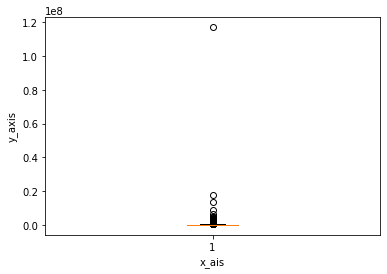

In [53]:
plt.boxplot(app_data1["AMT_INCOME_TOTAL"])
plt.xlabel("x_ais")
plt.ylabel("y_axis")
plt.show()

In [54]:
for i in range(app_data1.shape[0]):
    if app_data1["TARGET"][i]== 1 :
        app_data1["TARGET"][i] = "YES"
    elif app_data1["TARGET"][i] == 0:
        app_data1["TARGET"][i] = "OTHER"
    else:
        pass

In [55]:
app_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,YES,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,OTHER,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,OTHER,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,OTHER,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.535276,0.535276,0.535276,0.535276,0.535276,0.535276
4,100007,OTHER,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Checking for outlier with respect to "TARGET VARRIABLE"

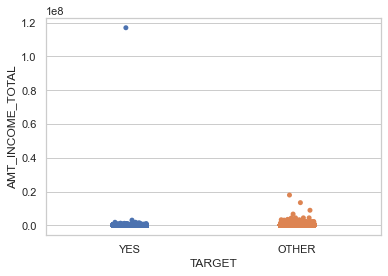

In [56]:
sns.set(style = 'whitegrid')
sns.stripplot(x=app_data1["TARGET"], y=app_data1["AMT_INCOME_TOTAL"], data=app_data1)
plt.show()

#### AMT_ANNUITY DISTRIBUTION CHECK

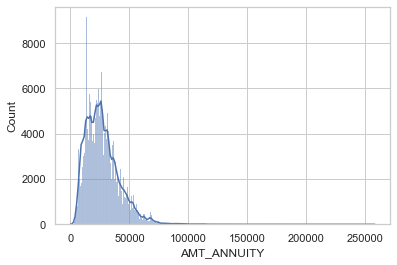

In [95]:
sns.histplot(data = app_data1, x = app_data1["AMT_ANNUITY"], kde = True)
plt.show()

#### Identifying column having high relationship with each other 

In [58]:
app_data1.corr()>0.5

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CNT_CHILDREN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AMT_INCOME_TOTAL,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AMT_CREDIT,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AMT_ANNUITY,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AMT_GOODS_PRICE,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
REGION_POPULATION_RELATIVE,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DAYS_BIRTH,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

## Univariate, Bivariate Analysis

#### Finding pattern in income earn by both defaulter and other and analysing it w.r.t Gender.

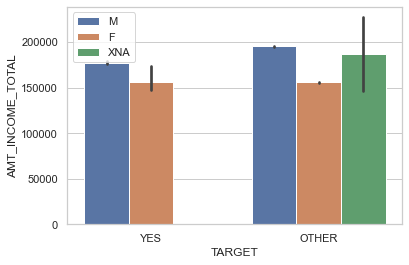

In [59]:
sns.barplot(x = app_data1["TARGET"],y = app_data1["AMT_INCOME_TOTAL"],data = app_data1,hue = app_data1["CODE_GENDER"])
plt.legend()
plt.show()


#### Finding pattern in Goods price by both defaulter and other and analysing it w.r.t Gender.

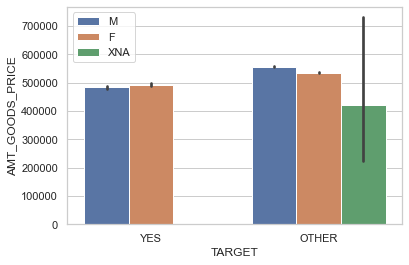

In [60]:
sns.barplot(x = app_data1["TARGET"],y = app_data1["AMT_GOODS_PRICE"],data = app_data1,hue = app_data1["CODE_GENDER"])
plt.legend()
plt.show()

#### Finding pattern in Credit amount provided to both defaulter and other and analysing it w.r.t Gender.

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

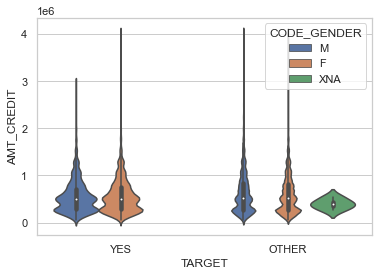

In [61]:
sns.set(style = 'whitegrid')
sns.violinplot(x =app_data1["TARGET"],
             y =app_data1["AMT_CREDIT"],
             hue =app_data1["CODE_GENDER"],
             style ="event",
             data = app_data1)

#### Finding pattern in annuity amount of both defaulter and other and analysing it w.r.t their educational background.

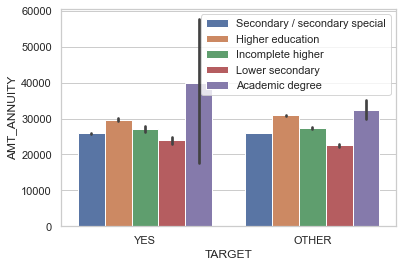

In [80]:
sns.barplot(x = app_data1["TARGET"],y = app_data1["AMT_ANNUITY"],data = app_data1,hue = app_data1["NAME_EDUCATION_TYPE"])
plt.legend(loc='best')
plt.show()

#### Finding pattern in annuity amount of both defaulter and other and analysing it w.r.t their family status

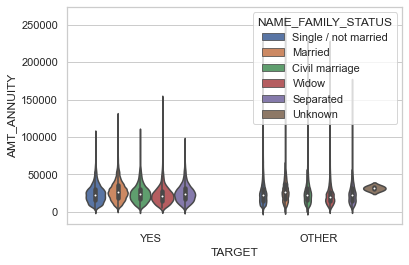

In [93]:
sns.set(style = 'whitegrid')
sns.violinplot(x =app_data1["TARGET"],
             y =app_data1["AMT_ANNUITY"],
             hue =app_data1["NAME_FAMILY_STATUS"],
             style ="event",
             data = app_data1)
plt.show()

#### Finding pattern in amount credit by both defaulter and other and analysing it w.r.t family status.

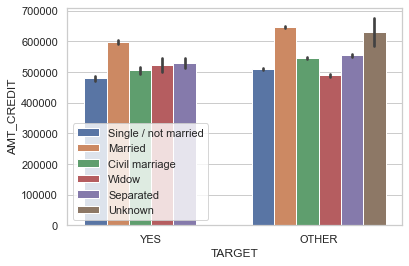

In [81]:
sns.barplot(x = app_data1["TARGET"],y = app_data1["AMT_CREDIT"],data = app_data1,hue = app_data1["NAME_FAMILY_STATUS"])
plt.legend(loc='best')
plt.show()

#### Analysing relationship between credit amount and annuity amount w.r.t gender


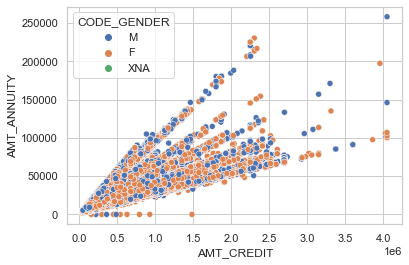

In [87]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_CREDIT"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["CODE_GENDER"],
                    data=app_data1)
plt.plot()
plt.show()

#### Analysing relationship between credit amount and annuity amount w.r.t Family status

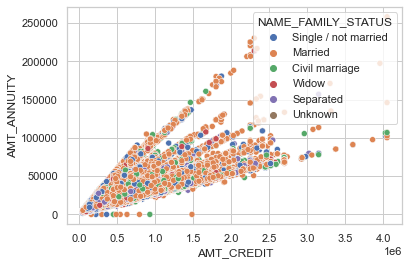

In [88]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_CREDIT"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["NAME_FAMILY_STATUS"],
                    data=app_data1)
plt.plot()
plt.show()

#### Analying Relation between annuity amound and goods price w.r.t family status

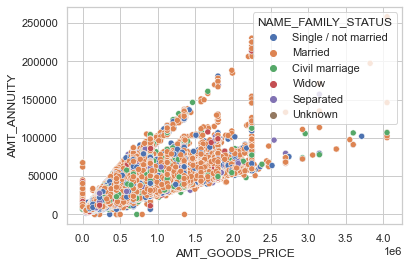

In [89]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_GOODS_PRICE"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["NAME_FAMILY_STATUS"],
                    data=app_data1)
plt.plot()
plt.show()

#### Analying Relation between annuity amound and goods price w.r.t gender

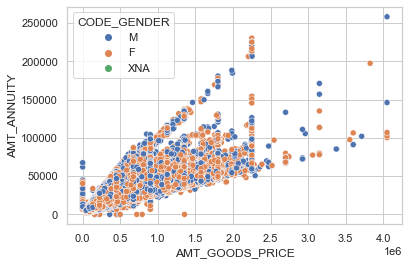

In [90]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_GOODS_PRICE"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["CODE_GENDER"],
                    data=app_data1)
plt.plot()
plt.show()

#### Analysing  annuity amount  w.r.t. income type of people 

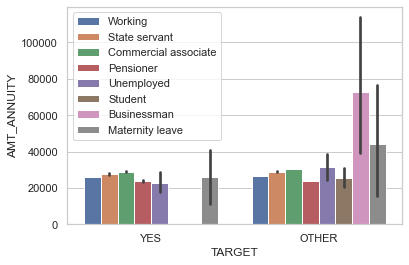

In [101]:
sns.barplot(x = app_data1["TARGET"],y = app_data1["AMT_ANNUITY"],data = app_data1,hue = app_data1["NAME_INCOME_TYPE"])
plt.legend()
plt.show()


#### Relationship between credit amount and annuity amount w.r.t income type

[]

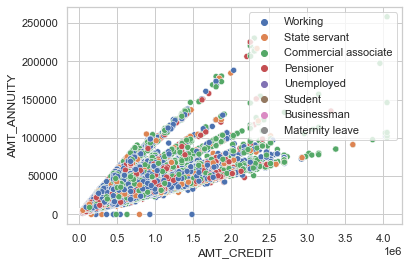

In [82]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_CREDIT"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["NAME_INCOME_TYPE"],
                    data=app_data1)
plt.legend(loc='best')
plt.plot()

#### Relationship between goods amount and annuity amount w.r.t income type

[]

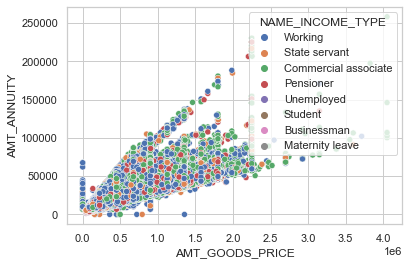

In [71]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_GOODS_PRICE"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["NAME_INCOME_TYPE"],
                    data=app_data1)
plt.plot()

#### Relationship between Target  and annuity amount w.r.t Housing type

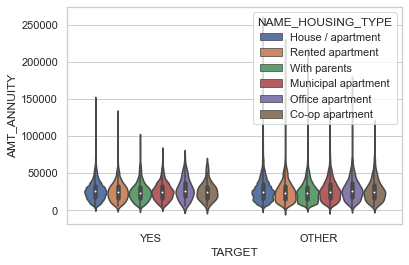

In [72]:
sns.set(style = 'whitegrid')
sns.violinplot(x =app_data1["TARGET"],
             y =app_data1["AMT_ANNUITY"],
             hue =app_data1["NAME_HOUSING_TYPE"],
             style ="event",
             data = app_data1)
plt.show()

#### Relationship between Days Employed and annuity amount w.r.t gender

[]

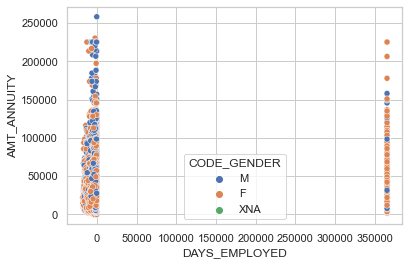

In [73]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["DAYS_EMPLOYED"],
                    y=app_data1["AMT_ANNUITY"],
                    hue = app_data1["CODE_GENDER"],
                    data=app_data1)
plt.plot()

#### Relationship between number of children and annuity amount w.r.t gender

[]

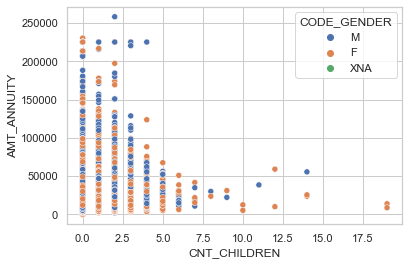

In [74]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["CNT_CHILDREN"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["CODE_GENDER"],
                    data=app_data1)
plt.plot()

#### Relationship between number of children and annuity amount w.r.t TARGET variable

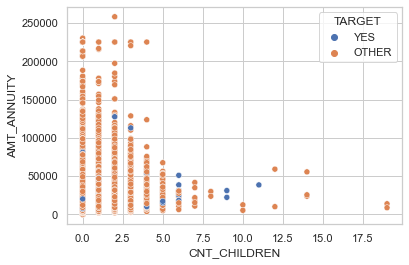

In [94]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["CNT_CHILDREN"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["TARGET"],
                    data=app_data1)
plt.plot()
plt.show()

#### Analysis in annuity amount w.r.t  occupation type

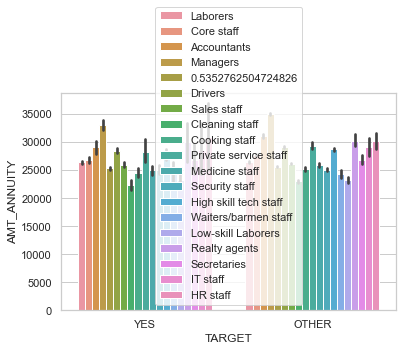

In [100]:
sns.barplot(x = app_data1["TARGET"],y = app_data1["AMT_ANNUITY"],data = app_data1,hue = app_data1["OCCUPATION_TYPE"])
plt.legend(loc='best')
plt.show()

#### Relationship between amount credit and annuity amount w.r.t occupation type

[]

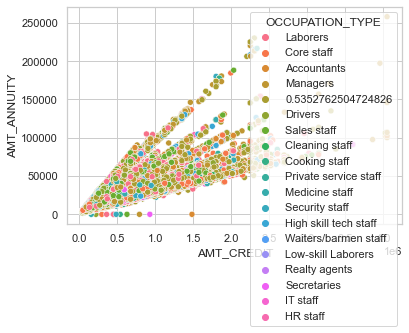

In [77]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_CREDIT"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["OCCUPATION_TYPE"],
                    data=app_data1)
plt.plot()

#### Relationship between goods price and annuity amount w.r.t occupation type

[]

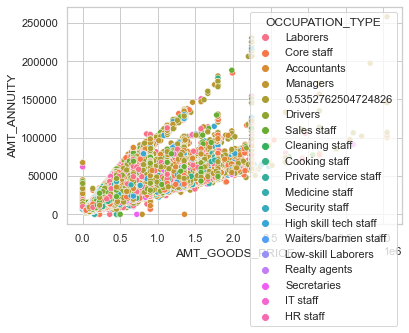

In [78]:
sns.set(style='whitegrid')
sns.scatterplot(x= app_data1["AMT_GOODS_PRICE"],
                    y=app_data1["AMT_ANNUITY"],
                    hue=app_data1["OCCUPATION_TYPE"],
                    data=app_data1)
plt.plot()

#### Relationship between target variable and annuity amount w.r.t occupation type

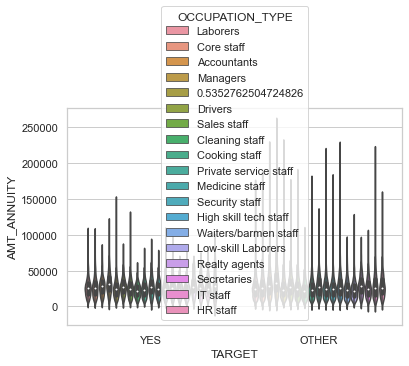

In [79]:
sns.set(style = 'whitegrid')
sns.violinplot(x =app_data1["TARGET"],
             y =app_data1["AMT_ANNUITY"],
             hue =app_data1["OCCUPATION_TYPE"],
             style ="event",
             data = app_data1)
plt.show()

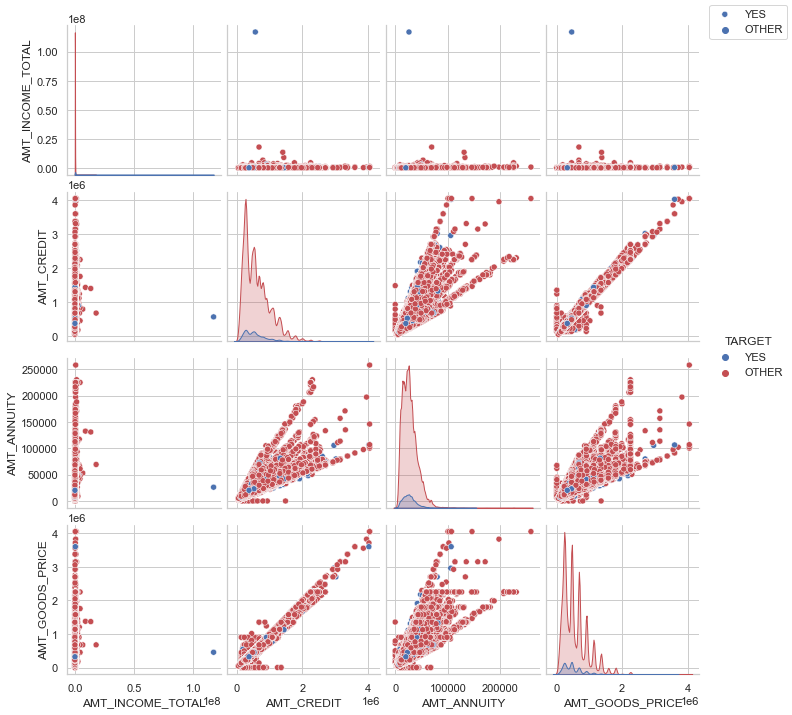

In [98]:
loan_price = app_data1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
loan_price = loan_price[(loan_price["AMT_GOODS_PRICE"].notnull()) & (loan_price["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(loan_price,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['YES','OTHER'])
plt.show()


## Insights:

##### There are less chances of default when there is annuity amount greather than 15K and Good Price Amount is also greater then 20K.  Most correlation is between the AMT_CREDIT and AMT_GOODS_PRICE as seen by the scatter plot. 